In [1]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
#Read CSV
df = pd.read_csv("student-mat.csv", sep = ";")

In [4]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         6   5   6   6  
1     1       3         4   5   5   6  
2     3       3        10   7   8  10  
3     1       5         2  15  14  15  
4     2       5         4   6  10  10

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
#check for null
# no null values

#df.isna().sum()

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
# store columns with specific data type
integer_columns = df.select_dtypes(include=['int64']).columns
#float_columns = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns

In [9]:
print(len(integer_columns), len(object_columns))

16 17


In [10]:
print("number of integer cols :", len(integer_columns))
print(integer_columns)

number of integer cols : 16
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


In [11]:
print("number of object cols :", len(object_columns))
print(object_columns)

number of object cols : 17
Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [12]:
# plt.figure( figsize =(10, 10), dpi = 250)
# sns.pairplot(df[integer_columns])

<AxesSubplot:ylabel='Frequency'>

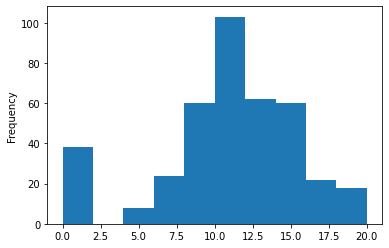

In [13]:
# final grade is 
df.G3.plot.hist()

Final grade G3 looks like normal, except for the part where some of students got scores of zero.
This may be because the students actual wrote the exam and got zero or for some reason they haven't appeared and got zero. For our analysis we can assume the normal distribution.

In [14]:
df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [15]:
# This correlation is for numerical values
df.corr()['G3'].sort_values(ascending = False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

In [16]:
# Encoding the categorical variables.

In [17]:
# Select only categorical variables
category_df = df.select_dtypes(include=['object'])

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the grade back in the dataframe
dummy_df['G3'] = df['G3']

# Find correlations with grade
dummy_df.corr()['G3'].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

In [18]:
# selecting the most correlated values and dropping the others
labels = df['G3']

# drop the school and grade columns
#student = student.drop(['school', 'G1', 'G2'], axis='columns')


# One-Hot Encoding of Categorical Variables
student = pd.get_dummies(df.iloc[:, :]).copy() ###################

In [19]:
len(student.columns)

59

In [20]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_GP          395 non-null    uint8
 17  school_MS       

In [21]:
student.head()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  school_GP  school_MS  sex_F  \
0     1     1       3         6   5   6   6          1          0      1   
1     1     1       3         4   5   5   6          1          0      1   
2     2     3       3        10   7   8  10          1          0      1   
3     1     1       5         2  15  14  15          1          0      1   
4     1     2       5         4   6  10  10          1          0      1   

   sex_M  address_R  address_U  famsize_GT3  famsize_LE3  Pstatus_A  \
0      0          0          1            1            0          1   
1      0          0          1            1            0          0   
2      0          0          1            0            1          0   
3      0          0          1            1            0          0   
4      0          0          1            1            0          0   

   Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  Mjob_services  \
0          0             1            0           0              0   
1          1             1            0           0              0   
2          1             1            0           0              0   
3          1             0            1           0              0   
4          1             0            0           1              0   

   Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  Fjob_services  \
0             0             0            0           0              0   
1             0             0            0           1              0   
2             0             0            0           1              0   
3             0             0            0           0              1   
4             0             0            0           1              0   

   Fjob_teacher  reason_course  reason_home  reason_other  reason_reputation  \
0             1              1            0             0                  0   
1             0              1            0             0                  0   
2             0              0            0             1                  0   
3             0              0            1             0                  0   
4             0              0            1             0                  0   

   guardian_father  guardian_mother  guardian_other  schoolsup_no  \
0                0                1               0             0   
1                1                0               0             1   
2                0                1               0             0   
3                0                1               0             1   
4                1                0               0             1   

   schoolsup_yes  famsup_no  famsup_yes  paid_no  paid_yes  activities_no  \
0              1          1           0        1         0              1   
1              0          0           1        1         0              1   
2              1          1           0        0         1              1   
3              0          0           1        0         1              0   
4              0          0           1        0         1              1   

   activities_yes  nursery_no  nursery_yes  higher_no  higher_yes  \
0               0           0            1          0           1   
1               0           1            0          0           1   
2               0           0            1          0           1   
3               1           0            1          0           1   
4               0           0            1          0           1   

   i

In [22]:
student.G3.describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [23]:
student.G3.mean()

10.415189873417722

In [24]:
student.school_MS.sum()

46

In [25]:
# We can drop the columns with '_no'
[col for col in student.columns if '_no' in col]

['schoolsup_no',
 'famsup_no',
 'paid_no',
 'activities_no',
 'nursery_no',
 'higher_no',
 'internet_no',
 'romantic_no']

In [26]:
# we have info of 46 people in school_MS, so we shall ignore the school columns as well
# sex_F, school_GP, school_MS, address_R, famsize_LE3, Pstatus_A, 
# We can drop the columns with '_no' because these are redundant.


In [27]:
cols_to_drop = ['schoolsup_no', 'famsup_no', 'paid_no', 'activities_no', 'nursery_no', 'higher_no',
 'internet_no', 'romantic_no','sex_F', 'school_GP', 'school_MS', 'address_R', 'famsize_LE3', 'Pstatus_A']

In [28]:
student_df = student.drop(columns = cols_to_drop).copy()

In [29]:
# No student has more than one guardian
#np.sum(student[[col for col in student.columns if 'guard' in col]].sum(axis = 1) > 1)

In [30]:
student_df.shape

(395, 45)

In [31]:
student_df[['G1','G2','failures', 'higher_yes', 'Medu', 'Fedu', 'age','G3' ]].corr()

G1        G2  failures  higher_yes      Medu      Fedu  \
G1          1.000000  0.852118 -0.354718    0.178264  0.205341  0.190270   
G2          0.852118  1.000000 -0.355896    0.179129  0.215527  0.164893   
failures   -0.354718 -0.355896  1.000000   -0.300316 -0.236680 -0.250408   
higher_yes  0.178264  0.179129 -0.300316    1.000000  0.168845  0.174566   
Medu        0.205341  0.215527 -0.236680    0.168845  1.000000  0.623455   
Fedu        0.190270  0.164893 -0.250408    0.174566  0.623455  1.000000   
age        -0.064081 -0.143474  0.243665   -0.209081 -0.163658 -0.163438   
G3          0.801468  0.904868 -0.360415    0.182465  0.217147  0.152457   

                 age        G3  
G1         -0.064081  0.801468  
G2         -0.143474  0.904868  
failures    0.243665 -0.360415  
higher_yes -0.209081  0.182465  
Medu       -0.163658  0.217147  
Fedu       -0.163438  0.152457  
age         1.000000 -0.161579  
G3         -0.161579  1.000000

<AxesSubplot:>

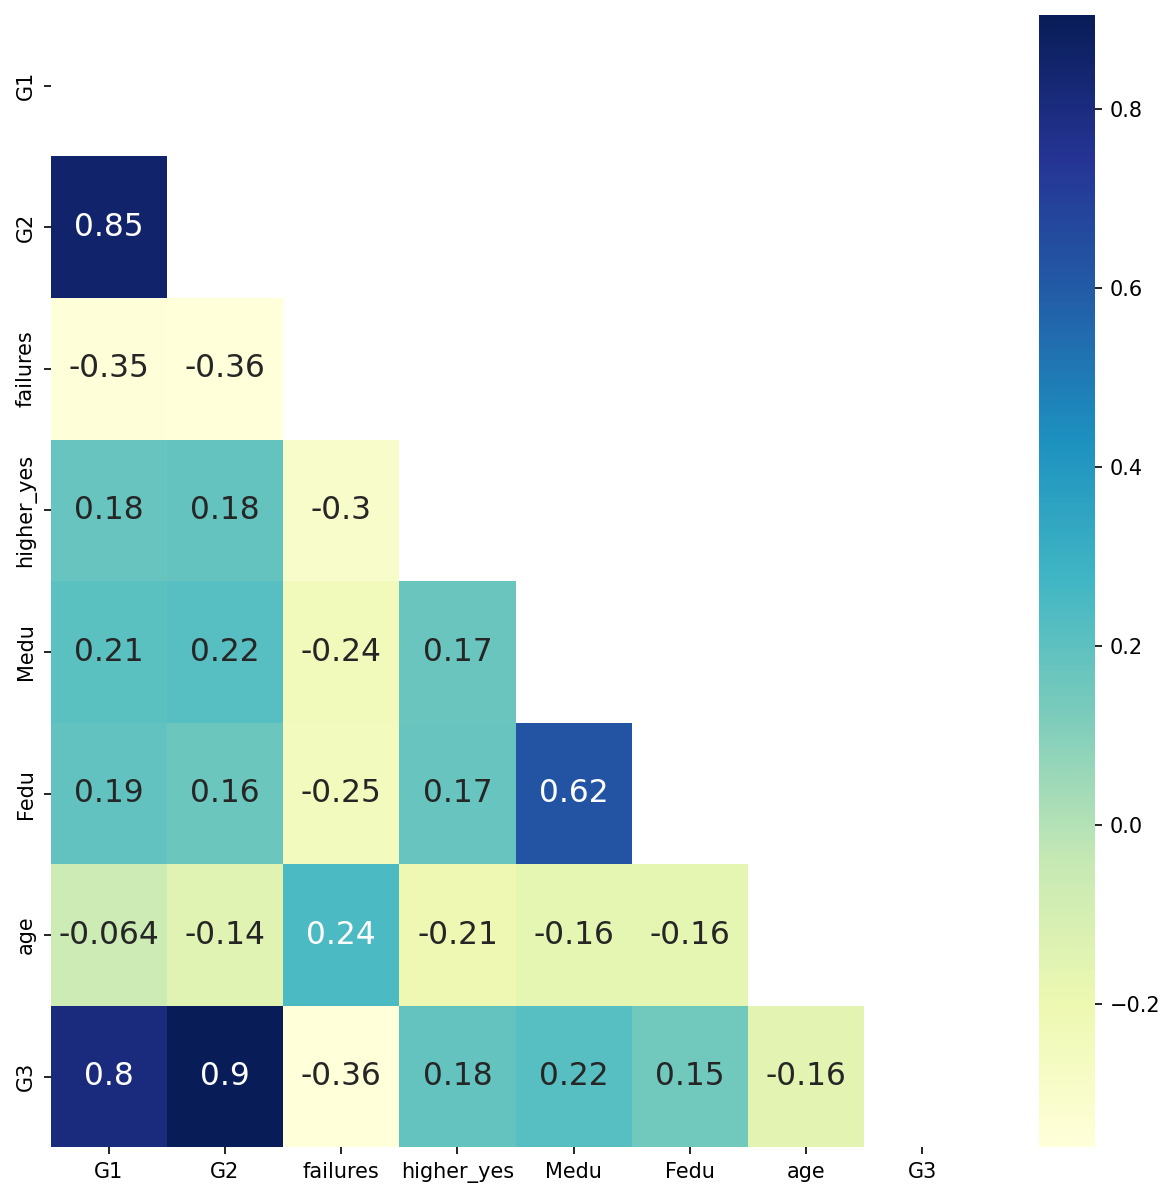

In [32]:
# check correlation between column
correlation_between_column = student_df[['G1','G2','failures', 'higher_yes', 'Medu', 'Fedu', 'age','G3' ]].corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(10,10), dpi = 150)
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

In [33]:
# Find correlations with the Grade
most_correlated = student_df.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
# most_correlated = most_correlated[:9]
# most_correlated

In [34]:
most_correlated # The effect of G1, G2 variables is more on G3.
# We can analysis when both G1,G2 available and when one of them is available

G3                   1.000000
G2                   0.904868
G1                   0.801468
failures             0.360415
Medu                 0.217147
higher_yes           0.182465
age                  0.161579
Fedu                 0.152457
goout                0.132791
romantic_yes         0.129970
traveltime           0.117142
Mjob_health          0.116158
Mjob_at_home         0.115634
address_U            0.105756
sex_M                0.103456
paid_yes             0.101996
reason_course        0.098950
internet_yes         0.098483
studytime            0.097820
Mjob_other           0.096477
reason_reputation    0.095692
Fjob_teacher         0.095374
guardian_other       0.087774
schoolsup_yes        0.082788
famsize_GT3          0.081407
Mjob_services        0.078429
health               0.061335
Pstatus_T            0.058009
Mjob_teacher         0.057712
Fjob_health          0.057111
Dalc                 0.054660
Fjob_other           0.053483
reason_other         0.052008
Walc      

In [35]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, median_absolute_error, r2_score

# Distributions
import scipy

In [36]:
student_df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3       sex_M   address_U  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     5.708861   10.908861   10.713924   10.415190    0.473418    0.777215   
std      8.003096    3.319195    3.761505    4.581443    0.499926    0.416643   
min      0.000000    3.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    8.000000    9.000000    8.000000    0.000000    1.000000   
50%      4.000000   11.000000   11.000000   11.000000    0.000000    1.000000   
75%      8.000000   13.000000   13.000000   14.000000    1.000000    1.000000   
max     75.000000   19.000000   19.000000   20.000000    1.000000    1.000000   

       famsize_GT3   Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  \
count   395.000000  395.000000    395.000000   395.000000  395.000000   
mean      0.711392    0.896203      0.149367     0.086076    0.356962   
std       0.453690    0.305384      0.356902     0.280832    0.479711   
min       0.000000    0.000000      0.000000     0.000000    0.000000   
25%       0.000000    1.000000      0.000000     0.000000    0.000000   
50%       1.000000    1.000000      0.000000     0.000000    0.000000   
75%       1.000000    1.000000      0.000000     0.000000    1.000000   
max       1.000000    1.000000      1.000000     1.000000    1.000000   

       Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  \
count     395.000000    395.000000    395.000000   395.000000  395.000000   
mean        0.260759      0.146835      0.050633     0.045570    0.549367   
std         0.439606      0.354391      0.219525     0.208814    0.498188   
min         0.000000      0.000000      0.000000     0.000000    0.000000   
25%         0.000000      0.000000      0.000000     0.000000    0.000000   
50%         0.000000      0.000000      0.000000     0.000000    1.000000   
75%         1.000000      0.000000      0.000000     0.000000    1.000000   
max         1.000000      1.000000      1.000000     1.000000    1.000000   

       Fjob_services  Fjob_teacher  reason_course  reason_home  reason_other  \
count     395.000000    395.000000     395.000000   395.000000    395.000000   
mean        0.281013      0.073418       0.367089     0.275949      0.091139   
std         0.450064      0.261152       0.482622     0.447558      0.288172   
min         0.000000      0.000000       0.000000     0.000000      0.000000   
25%         0.000000      0.000000       0.000000     0.000000      0.00

In [37]:
student_df.shape

(395, 45)

In [38]:
# There are 44 features(after one-hot and removal of some redundant features) excluding G3 for modelling.

## Lets test the results if we exclude 'G1', 'G2' columns

In [39]:
# First lets exclude G1, G2 and try to do regression
student_df.drop(columns = ['G1', 'G2'], inplace = True)

In [40]:
y = student_df['G3'].values

In [41]:
X = student_df.drop(columns = ['G3']).values

In [42]:
# We can use min-max scalar
# We can use stratified K-FOLD or train-test-split

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [43]:
## Split the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [44]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(296, 42) (99, 42) (296,) (99,)


In [45]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'Ridge Regression',
                      'Random Forest', 'SVM', 'DecisionTree Regression']
#     X_train = X_train.drop('G3', axis='columns')
#     X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    lr = LinearRegression()
    #enet_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)
    #lasso_reg = Lasso(random_state = 1)
    ridge_reg = Ridge(random_state = 1)
    rf_reg = RandomForestRegressor(n_estimators=100, random_state = 1,bootstrap = True)
    sv_reg = SVR(kernel='linear',degree = 2,C=1.0, gamma='auto')
    dt_reg = DecisionTreeRegressor(random_state = 1)
    #model6 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae_train', 'mae_test',
                                    'mse_train', 'mse_test',
                                   'r2_train', 'r2_test'], index = model_name_list)
    
    models = [lr, ridge_reg, rf_reg, sv_reg, dt_reg]
    
    # Train and predict with each model
    for i, model in enumerate(models):
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_test = model.predict(X_test)
        
        # Metrics
        metric_mae_train = np.mean(abs(predictions_train - y_train))
        metric_mse_train = np.mean((predictions_train - y_train) ** 2)
        metric_r2_train  = abs(r2_score(y_train, predictions_train))
        
        metric_mae_test = np.mean(abs(predictions_test - y_test))
        metric_mse_test = np.mean((predictions_test - y_test) ** 2)
        metric_r2_test  = abs(r2_score(y_test, predictions_test))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [metric_mae_train, metric_mae_test, 
                                      metric_mse_train, metric_mse_test,
                                     metric_r2_train, metric_r2_test]
    
    
    return results

In [46]:
# Evaluate the Regression results
reg_results = evaluate(X_train, X_test, y_train, y_test)
reg_results

mae_train  mae_test  mse_train   mse_test  r2_train  \
Linear Regression        2.997361  3.540088  14.575403  21.297139  0.346112   
Ridge Regression         2.997429  3.479208  14.600358  20.746416  0.344992   
Random Forest             1.16098  2.561111   2.288944  13.008348  0.897312   
SVM                       2.87565  3.162118  16.049273  18.519979   0.27999   
DecisionTree Regression       0.0  3.919192        0.0   25.69697       1.0   

                          r2_test  
Linear Regression        0.269713  
Ridge Regression          0.23688  
Random Forest            0.224456  
SVM                      0.104142  
DecisionTree Regression  0.532027

In [47]:
#reg_results[[col for col in reg_results.columns if 'test' in col]]
reg_results[["mse_test"]]

mse_test
Linear Regression        21.297139
Ridge Regression         20.746416
Random Forest            13.008348
SVM                      18.519979
DecisionTree Regression   25.69697

Random Forest has the better r-squared value. Also we didn't include the G1, G2 predictors so the r-squared value is less. If we include one, both or avg of them there will be increase in the r-square value.

## Lets test the results if we include 'G1',  exclude 'G2' column

In [48]:
cols_to_drop = ['schoolsup_no', 'famsup_no', 'paid_no', 'activities_no', 'nursery_no', 'higher_no',
 'internet_no', 'romantic_no','sex_F', 'school_GP', 'school_MS', 'address_R', 'famsize_LE3', 'Pstatus_A']
student_df = student.drop(columns = cols_to_drop).copy()

X = student_df.drop(columns = ['G3','G2']).values
y = student_df['G3'].values

# We can use min-max scalar

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Split the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(296, 43) (99, 43) (296,) (99,)


In [49]:
# Evaluate the Regression results
reg_results_G1 = evaluate(X_train, X_test, y_train, y_test)
reg_results_G1

mae_train  mae_test mse_train   mse_test  r2_train  \
Linear Regression        1.847214  1.973998  6.273008   7.010383  0.718578   
Ridge Regression         1.812594  2.011433  6.367034   7.392724  0.714359   
Random Forest            0.653649  1.468788  0.913593   3.757868  0.959014   
SVM                      1.740876  1.925469  8.232165   8.142793  0.630685   
DecisionTree Regression       0.0  2.272727       0.0  11.686869       1.0   

                          r2_test  
Linear Regression        0.582048  
Ridge Regression         0.559253  
Random Forest             0.77596  
SVM                      0.514535  
DecisionTree Regression  0.303241

In [50]:
#reg_results_G1[[col for col in reg_results.columns if 'test' in col]]
reg_results_G1[["mse_test"]]

mse_test
Linear Regression         7.010383
Ridge Regression          7.392724
Random Forest             3.757868
SVM                       8.142793
DecisionTree Regression  11.686869

## Lets do the analysis including 'G1', 'G2' columns

In [51]:
cols_to_drop = ['schoolsup_no', 'famsup_no', 'paid_no', 'activities_no', 'nursery_no', 'higher_no',
 'internet_no', 'romantic_no','sex_F', 'school_GP', 'school_MS', 'address_R', 'famsize_LE3', 'Pstatus_A']
student_df = student.drop(columns = cols_to_drop).copy()

X = student_df.drop(columns = ['G3']).values
y = student_df['G3'].values

# We can use min-max scalar

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Split the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(296, 44) (99, 44) (296,) (99,)


In [52]:
# Evaluate the Regression results
reg_results_G1G2 = evaluate(X_train, X_test, y_train, y_test)
reg_results_G1G2



mae_train  mae_test mse_train  mse_test  r2_train  \
Linear Regression        1.167151  1.377289  3.123536  4.170065  0.859871   
Ridge Regression         1.183416  1.390882  3.276438  4.349754  0.853011   
Random Forest            0.368649  1.019192  0.362759  2.393519  0.983726   
SVM                      1.068725  1.294572   4.10955  4.697673  0.815636   
DecisionTree Regression       0.0  1.222222       0.0  4.454545       1.0   

                          r2_test  
Linear Regression        0.751385  
Ridge Regression         0.740672  
Random Forest            0.857301  
SVM                       0.71993  
DecisionTree Regression  0.734425

In [53]:
#reg_results_G1G2[[col for col in reg_results.columns if 'test' in col]]
reg_results_G1G2[["mse_test"]]

mse_test
Linear Regression        4.170065
Ridge Regression         4.349754
Random Forest            2.393519
SVM                      4.697673
DecisionTree Regression  4.454545

### Aggregated results for the MSE values for 3 setups

In [54]:
agg_regression_results = pd.concat([reg_results[["mse_test"]], reg_results_G1[["mse_test"]], reg_results_G1G2[["mse_test"]]], axis = 1)
agg_regression_results.columns = ['mse_test', 'mse_test_G1', 'mse_test_G1G2']
agg_regression_results = agg_regression_results.astype('float32')

In [55]:
agg_regression_results

mse_test  mse_test_G1  mse_test_G1G2
Linear Regression        21.297138     7.010383       4.170065
Ridge Regression         20.746416     7.392725       4.349754
Random Forest            13.008348     3.757868       2.393519
SVM                      18.519979     8.142793       4.697673
DecisionTree Regression  25.696970    11.686869       4.454545

In [56]:
# line plots

Text(0, 0.5, 'Mean Squared Error Value')

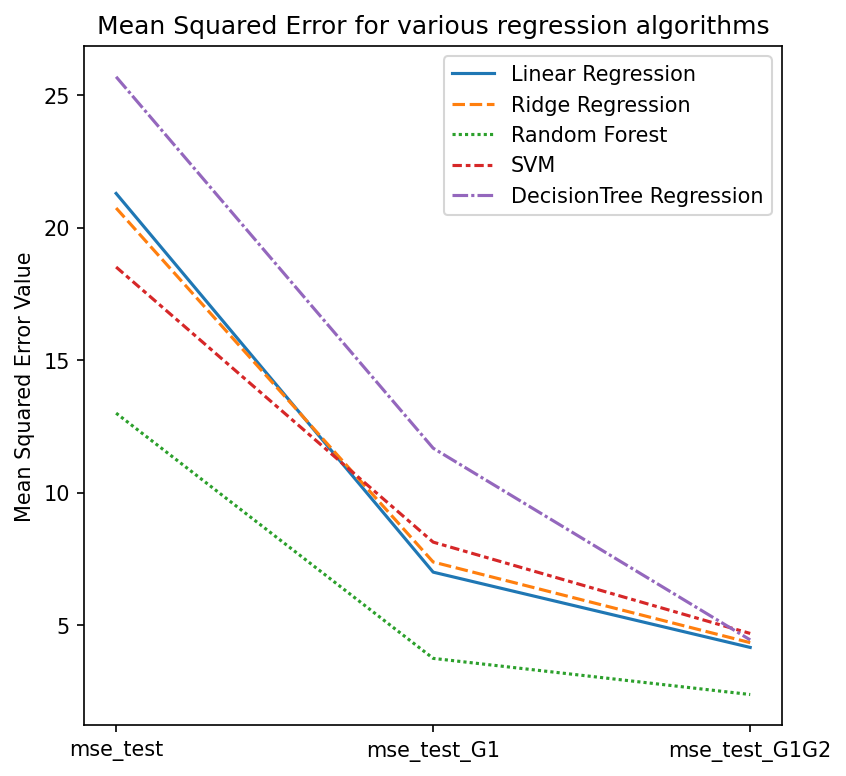

In [57]:
plt.figure(figsize= (6,6),  dpi = 150)
#sns.diverging_palette(220, 20, as_cmap = True, center = "dark")
sns.lineplot(data = agg_regression_results.T)#, palette = "coolwarm")
plt.title("Mean Squared Error for various regression algorithms")
plt.ylabel("Mean Squared Error Value")
#plt.xticks(["Without G1", "With G1", "With G2"])

In [58]:
reg_results_G1G2.r2_test

Linear Regression          0.751385
Ridge Regression           0.740672
Random Forest              0.857301
SVM                         0.71993
DecisionTree Regression    0.734425
Name: r2_test, dtype: object

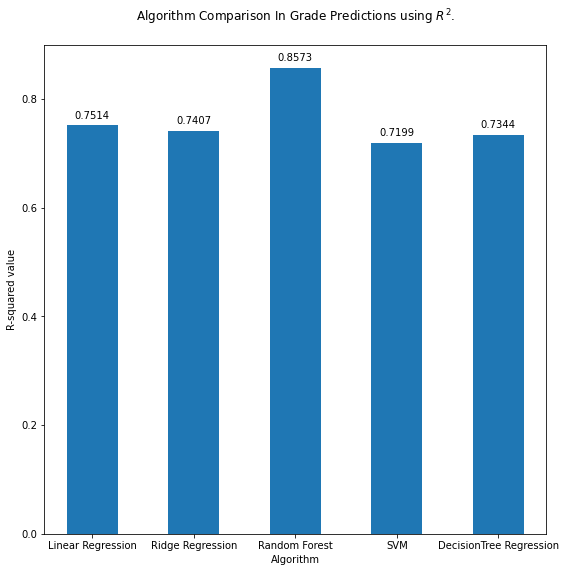

In [59]:
algorithm = list(reg_results_G1G2.index)
score = list(np.round(list(reg_results_G1G2.r2_test),4))

x = np.arange(len(algorithm))
width = 0.5

fig, ax = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(9)
ax.set_title("Algorithm Comparison In Grade Predictions using $R^2$.\n")
ax.set_xlabel("Algorithm")
ax.set_ylabel("R-squared value")
ax.set_xticks(x)
ax.set_xticklabels(algorithm)

algo_frame = ax.bar(x, score, width, label='Algorithm')
for algo in algo_frame:
    height = algo.get_height()
    ax.annotate("{}".format(height),
                xy = (algo.get_x() + algo.get_width() / 2, height),
                xytext = (0,5),
                textcoords="offset points",
                ha='center', va='bottom')
    
plt.show()

## Best decision tree for Regressor

In [60]:
cols_to_drop = ['schoolsup_no', 'famsup_no', 'paid_no', 'activities_no', 'nursery_no', 'higher_no',
 'internet_no', 'romantic_no','sex_F', 'school_GP', 'school_MS', 'address_R', 'famsize_LE3', 'Pstatus_A']
student_df = student.drop(columns = cols_to_drop).copy()

X = student_df.drop(columns = ['G3']).values
y = student_df['G3'].values

# We can use min-max scalar

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Split the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(296, 44) (99, 44) (296,) (99,)


In [61]:
n_estimators=100
rf_reg = RandomForestRegressor(n_estimators=100, random_state = 1,bootstrap = True, max_depth = 6)
rf_reg.fit(X_train, y_train)  

from sklearn.metrics import mean_squared_error

estimatorMSE=[]
for curEstimator in range(n_estimators):
    estimatorMSE.append([curEstimator,mean_squared_error(y_test, rf_reg.estimators_[curEstimator].predict(X_test))])

estimatorMSE=pd.DataFrame(estimatorMSE,columns=['estimatorNumber','mean_squared_error'])
estimatorMSE.sort_values(inplace=True,by='mean_squared_error',)

bestDecisionTree_reg = rf_reg.estimators_[estimatorMSE.head(1)['estimatorNumber'].values[0]]


In [62]:
bestDecisionTree_reg

DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=1624109689)

In [63]:
X_test.shape, y_test.shape

((99, 44), (99,))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted vs Desired Values for the best regression model.')

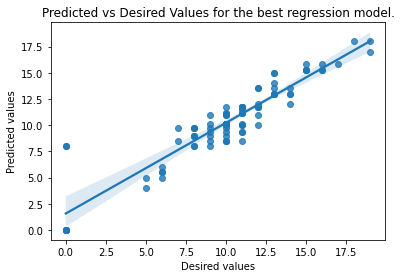

In [64]:
#plt.figure(figsize = (7,7))
sns.regplot(y_test,bestDecisionTree_reg.predict(X_test))
plt.xlabel("Desired values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Desired Values for the best regression model.")



In [65]:
# Colnames for X 
colnames = student_df.drop(columns = ['G3']).columns.to_list()

In [66]:
# Extract single tree for Regressor
estimator = bestDecisionTree_reg

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree-reg.dot', 
                feature_names = colnames,
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# convert the .dot file to .png image
!dot -Tpng tree-reg.dot -o tree-reg.png -Gdpi=600

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree-reg.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.823291 to fit


In [67]:
estimatorMSE.head()

estimatorNumber  mean_squared_error
58               58            2.287539
80               80            2.474285
45               45            2.672687
21               21            2.887980
70               70            2.892288

In [68]:
## The n_estimators = 58 gives teh lowest value for the mean_squared_error.

In [69]:
student.G3.value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

# Binary Classification

In [70]:
# Import necessary classification libraries
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [71]:
# Import necessary classification metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [72]:
cols_to_drop = ['schoolsup_no', 'famsup_no', 'paid_no', 'activities_no', 'nursery_no', 'higher_no',
 'internet_no', 'romantic_no','sex_F', 'school_GP', 'school_MS', 'address_R', 'famsize_LE3', 'Pstatus_A']
student_df = student.drop(columns = cols_to_drop).copy()
student_df.shape

(395, 45)

## Lets do the analysis without G1, G2

In [73]:
y = student_df['G3'].values
## Binary Classification with G3 > 10 as an event and G3 <= 10 not an event.
y = np.where(y > 10, 1, 0)

X = student_df.drop(columns = ['G3','G1','G2']).values

# We can use min-max scalar
# We can use stratified K-FOLD or train-test-split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

# train test with stratified
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify = y )

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(296, 42) (99, 42) (296,) (99,)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comparision of pass(1) and fail(0)'}, ylabel='count'>

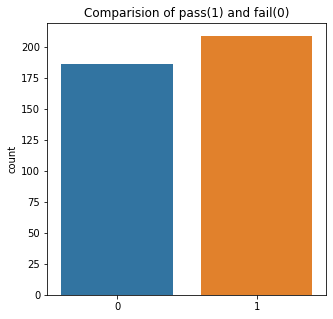

In [74]:
plt.figure(figsize=(5,5))
plt.title("Comparision of pass(1) and fail(0)")
sns.countplot(y)



In [75]:
y.sum(), len(y)-y.sum()

(209, 186)

The above shows the count of different classes in the target variable.
There is no imbalanced problem involved in terms of class labels.

Text(0.5, 1.0, 'Testing Set')

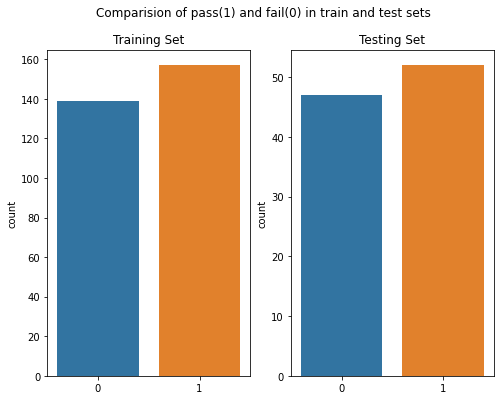

In [76]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,6))
fig.suptitle('Comparision of pass(1) and fail(0) in train and test sets')
sns.countplot(x = y_train, ax = ax1)
sns.countplot(x = y_test, ax = ax2)

fig.subplots_adjust(top=0.88)

ax1.set_title('Training Set')
ax2.set_title('Testing Set')


# plt.figure(figsize=(5,5))
# plt.title("Comparision of pass(1) and fail(0)")
# sns.countplot(y)


As we used stratified train-test-split, the training and testing sets are true representative of the original dataset.

In [77]:
# Evaluate several ml models by training on training set and testing on testing set

def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Logistic Regression', 'KNN Classifier',
                      'Support Vector Classifier', 'DecisionTreeClassifier',
                       'RandomForestClassifier']
#     X_train = X_train.drop('G3', axis='columns')
#     X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    lr_model = LogisticRegression(random_state = 1)
    knn_model = KNeighborsClassifier()
    svc_model = SVC(random_state = 1, probability = True)
    dt_model = DecisionTreeClassifier(random_state = 1)
    rf_model = RandomForestClassifier(random_state = 1, bootstrap=True)
        
    
    # Dataframe for results
    results = pd.DataFrame(columns=['train_accuracy', 'test_accuracy',
                                   'train_f1_score', 'test_f1_score',
                                   'train_roc_auc_score', 'test_roc_auc_score'], index = model_name_list)
    
    models = [lr_model, knn_model, svc_model, dt_model, rf_model]
    
   
    # Train and predict with each model
    for i, model in enumerate(models):
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_test = model.predict(X_test)
        
        # Metrics ---- accuracy_score, f1_score, roc_auc_score
        
        accuracy_score_train = accuracy_score(y_train, predictions_train)
        f1_score_train       = f1_score(y_train, predictions_train)
        roc_auc_score_train  = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])

        accuracy_score_test  = accuracy_score(y_test, predictions_test)
        f1_score_test        = f1_score(y_test, predictions_test)
        roc_auc_score_test   = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        
        
        ax = plt.gca()
        
        plot_roc_curve(model.fit(X_train, y_train), X_test, y_test, ax=ax)
        plt.title("Comparision of ROC curves for various classifiers \n")
        
      
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [accuracy_score_train, accuracy_score_test, f1_score_train,
                                      f1_score_test, roc_auc_score_train, roc_auc_score_test]
    
   
    return results

train_accuracy test_accuracy train_f1_score  \
Logistic Regression             0.726351      0.686869       0.750769   
KNN Classifier                  0.689189      0.575758        0.72619   
Support Vector Classifier       0.837838      0.656566       0.855422   
DecisionTreeClassifier               1.0      0.565657            1.0   
RandomForestClassifier               1.0      0.656566            1.0   

                          test_f1_score train_roc_auc_score test_roc_auc_score  
Logistic Regression            0.730435            0.805893            0.73036  
KNN Classifier                 0.611111             0.74323           0.582651  
Support Vector Classifier      0.711864            0.916831           0.727905  
DecisionTreeClassifier         0.612613                 1.0           0.560966  
RandomForestClassifier         0.701754                 1.0           0.762275

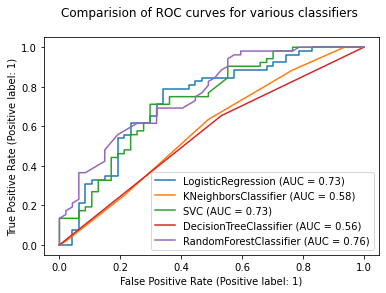

In [78]:
# Evaluate the Classification results
classification_results = evaluate(X_train, X_test, y_train, y_test)
classification_results

In [79]:
classification_results[[col for col in classification_results.columns if 'test' in col]]

test_accuracy test_f1_score test_roc_auc_score
Logistic Regression            0.686869      0.730435            0.73036
KNN Classifier                 0.575758      0.611111           0.582651
Support Vector Classifier      0.656566      0.711864           0.727905
DecisionTreeClassifier         0.565657      0.612613           0.560966
RandomForestClassifier         0.656566      0.701754           0.762275

Without G1, G2 columns the accuracy is not so good.

## Lets test the results if we include 'G1',  exclude 'G2' column

In [80]:
# if only 'G1' available and 'G2' not available

y = student_df['G3'].values
## Binary Classification with G3 > 10 as an event and G3 <= 10 not an event.
y = np.where(y > 10, 1, 0)

X = student_df.drop(columns = ['G3','G2']).values

# We can use min-max scalar
# We can use stratified K-FOLD or train-test-split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

## Split the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(296, 43) (99, 43) (296,) (99,)


train_accuracy test_accuracy train_f1_score  \
Logistic Regression             0.905405       0.79798       0.913043   
KNN Classifier                  0.692568      0.575758        0.74221   
Support Vector Classifier       0.949324      0.777778       0.954128   
DecisionTreeClassifier               1.0      0.838384            1.0   
RandomForestClassifier               1.0      0.858586            1.0   

                          test_f1_score train_roc_auc_score test_roc_auc_score  
Logistic Regression            0.795918            0.971485            0.89239  
KNN Classifier                 0.618182            0.793717            0.59063  
Support Vector Classifier       0.77551            0.987746           0.856383  
DecisionTreeClassifier             0.84                 1.0           0.841039  
RandomForestClassifier         0.857143                 1.0           0.943535

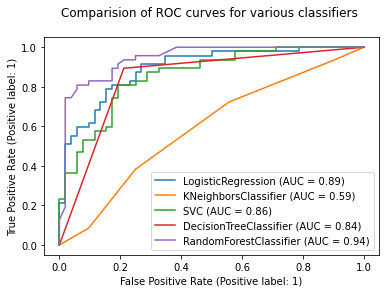

In [81]:
# Evaluate the Classification results with G1, G2 predictors included
classification_results_G1 = evaluate(X_train, X_test, y_train, y_test)
classification_results_G1

In [82]:
classification_results_G1[[col for col in classification_results.columns if 'test' in col]]

test_accuracy test_f1_score test_roc_auc_score
Logistic Regression             0.79798      0.795918            0.89239
KNN Classifier                 0.575758      0.618182            0.59063
Support Vector Classifier      0.777778       0.77551           0.856383
DecisionTreeClassifier         0.838384          0.84           0.841039
RandomForestClassifier         0.858586      0.857143           0.943535

We could see the accuracy is now better by including G1 column

## Lets test the results if we include 'G1', 'G2' columns

In [83]:
# cols_to_drop = ['schoolsup_no', 'famsup_no', 'paid_no', 'activities_no', 'nursery_no', 'higher_no',
#  'internet_no', 'romantic_no','sex_F', 'school_GP', 'school_MS', 'address_R', 'famsize_LE3', 'Pstatus_A']
# student_df = student.drop(columns = cols_to_drop).copy()
# student_df.shape
y = student_df['G3'].values
## Binary Classification with G3 > 10 as an event and G3 <= 10 not an event.
y = np.where(y > 10, 1, 0)

X = student_df.drop(columns = ['G3']).values

# We can use min-max scalar
# We can use stratified K-FOLD or train-test-split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

## Split the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(296, 44) (99, 44) (296,) (99,)


In [84]:
student_df.shape

(395, 45)

train_accuracy test_accuracy train_f1_score  \
Logistic Regression             0.949324      0.838384       0.954128   
KNN Classifier                  0.733108      0.606061       0.774929   
Support Vector Classifier       0.969595       0.79798       0.972136   
DecisionTreeClassifier               1.0       0.79798            1.0   
RandomForestClassifier               1.0      0.888889            1.0   

                          test_f1_score train_roc_auc_score test_roc_auc_score  
Logistic Regression            0.836735             0.99005           0.925532  
KNN Classifier                 0.648649            0.824742           0.639116  
Support Vector Classifier      0.795918            0.996637           0.894435  
DecisionTreeClassifier              0.8                 1.0           0.800532  
RandomForestClassifier         0.886598                 1.0           0.942717

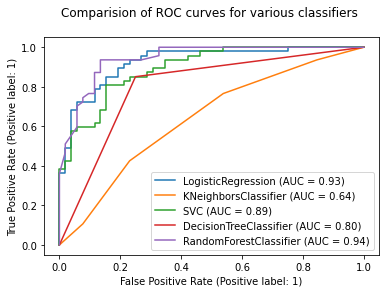

In [85]:
# Evaluate the Classification results with G1, G2 predictors included
classification_results_G1G2 = evaluate(X_train, X_test, y_train, y_test)
classification_results_G1G2

In [86]:
classification_results_G1G2[[col for col in classification_results.columns if 'test' in col]]

test_accuracy test_f1_score test_roc_auc_score
Logistic Regression            0.838384      0.836735           0.925532
KNN Classifier                 0.606061      0.648649           0.639116
Support Vector Classifier       0.79798      0.795918           0.894435
DecisionTreeClassifier          0.79798           0.8           0.800532
RandomForestClassifier         0.888889      0.886598           0.942717

We could notice that the accuracy values are even better compared to previous situation where we have excluded the 'G2' predictor.
Here also the RandomForestClassifier is the better performer.

In [87]:
agg_classification_results = pd.concat([classification_results[["test_accuracy"]], classification_results_G1[["test_accuracy"]], classification_results_G1G2[["test_accuracy"]]], axis = 1)

agg_classification_results.columns = ['accuracy_test', 'accuracy_test_G1', 'accuracy_test_G1G2']
agg_classification_results = agg_classification_results.astype('float32')

In [88]:
agg_classification_results

accuracy_test  accuracy_test_G1  accuracy_test_G1G2
Logistic Regression             0.686869          0.797980            0.838384
KNN Classifier                  0.575758          0.575758            0.606061
Support Vector Classifier       0.656566          0.777778            0.797980
DecisionTreeClassifier          0.565657          0.838384            0.797980
RandomForestClassifier          0.656566          0.858586            0.888889

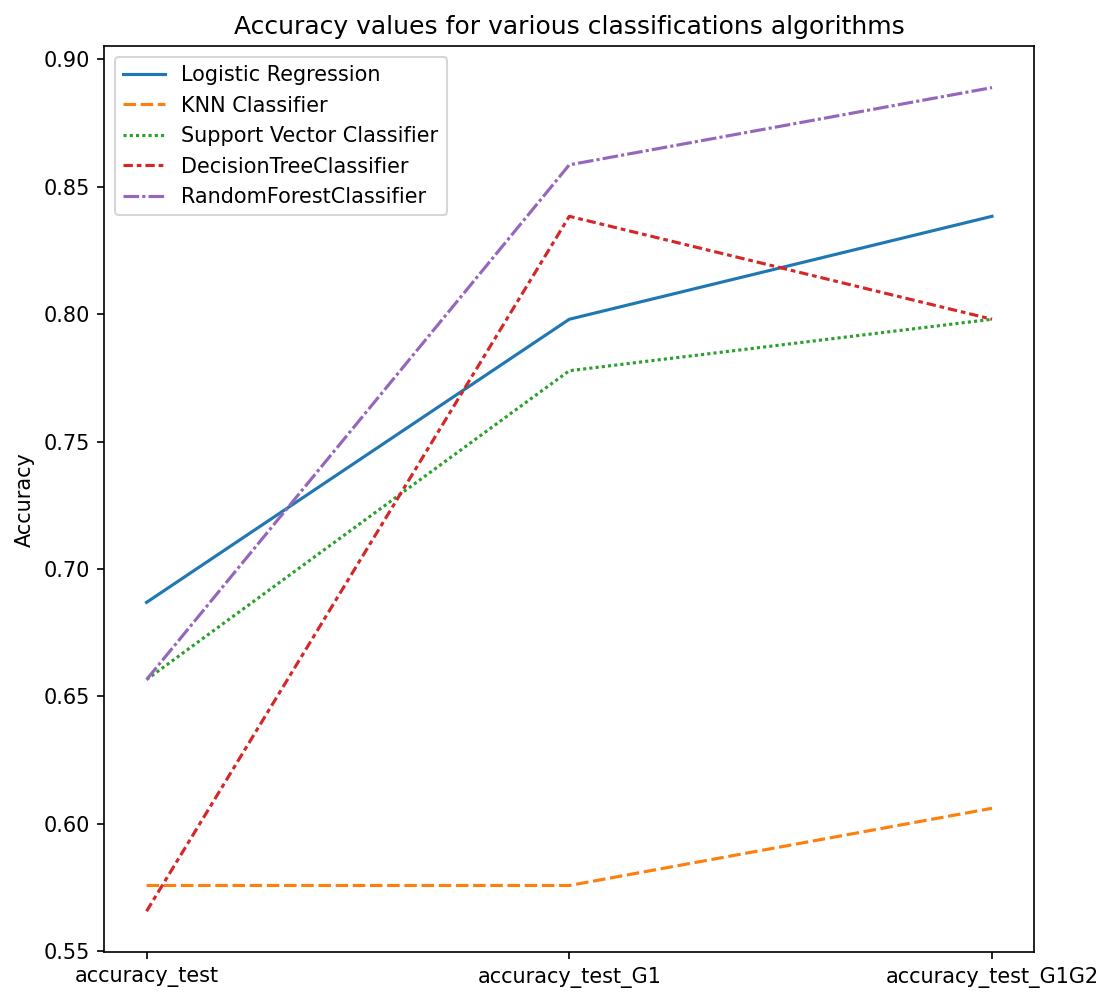

In [89]:
# Line plots
plt.figure(figsize= (8, 8),  dpi = 150)
#sns.diverging_palette(220, 20, as_cmap = True, center = "dark")
sns.lineplot(data = agg_classification_results.T)#, palette = "coolwarm")
plt.title("Accuracy values for various classifications algorithms")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
#plt.xticks(["Without G1", "With G1", "With G2"])

From the above graph, we can see that the by adding G1 or "G1 and G2" variables increase the accuracy score in all algorithms except in decision tree.
The randomforest model gives the better accuracy.

In [90]:
agg_classification_results

accuracy_test  accuracy_test_G1  accuracy_test_G1G2
Logistic Regression             0.686869          0.797980            0.838384
KNN Classifier                  0.575758          0.575758            0.606061
Support Vector Classifier       0.656566          0.777778            0.797980
DecisionTreeClassifier          0.565657          0.838384            0.797980
RandomForestClassifier          0.656566          0.858586            0.888889

In [91]:
## random forest classifier
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(296, 44) (99, 44) (296,) (99,)


In [92]:
rf_model = RandomForestClassifier(random_state = 1, bootstrap=True, n_estimators = 25)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=1)

In [93]:
# Colnames for X 
colnames = student_df.drop(columns = ['G3']).columns.to_list()

## Random Forest Classifier hyperparameter tuning

In [94]:
print(X.shape, y.shape)

(395, 44) (395,)


## Explore Tree Depth

In [95]:
# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 12 and None=full
	depths = [i for i in range(1,12)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>1 0.938 (0.036)
>2 0.937 (0.039)
>3 0.940 (0.035)
>4 0.942 (0.033)
>5 0.943 (0.036)
>6 0.945 (0.036)
>7 0.942 (0.036)
>8 0.939 (0.034)
>9 0.942 (0.033)
>10 0.940 (0.038)
>11 0.938 (0.038)
>None 0.938 (0.039)


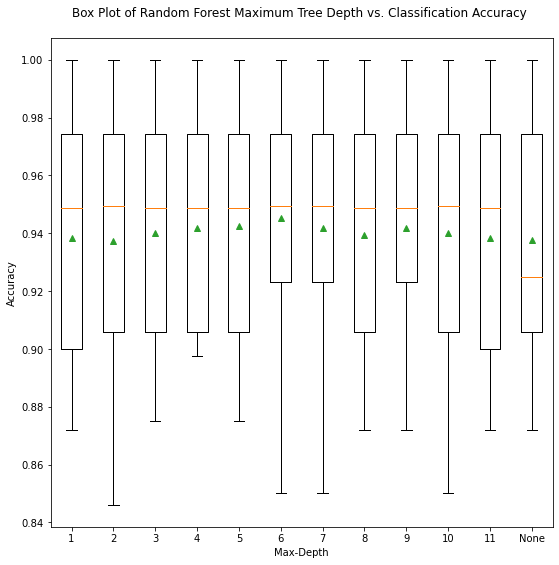

In [96]:
# plot model performance for comparison
plt.figure(figsize = (9,9))# dpi = 600)
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel("Max-Depth")
plt.ylabel("Accuracy")
plt.title("Box Plot of Random Forest Maximum Tree Depth vs. Classification Accuracy \n")
plt.show()

The maximum tree depth can be specified via the max_depth argument and is set to None (no maximum depth) by default. The above box plot represents how the accuracy values vary for different max_depth_size value. 10-Fold cross-validation is performed with 

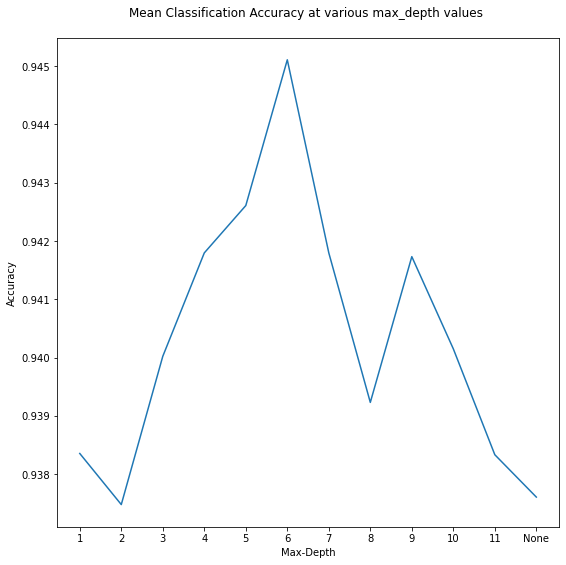

In [97]:
# plot model performance for comparison
plt.figure(figsize = (9,9))# dpi = 600)
plt.plot(names, [mean(i) for i in results])
plt.xlabel("Max-Depth")
plt.ylabel("Accuracy")
plt.title("Mean Classification Accuracy at various max_depth values \n")
plt.show()

With max_depth = 4, we have achieved a better value for the accuracy score, but max_depth = 5,6,7 are good as well.

## Exploring n_estimators.

We shall vary the values of max_depth from 4 to 7 and look for the "n_estimators" which gives a better accuracy.

In [98]:
y = student_df['G3'].values
## Binary Classification with G3 > 10 as an event and G3 <= 10 not an event.
y = np.where(y > 10, 1, 0)

X = student_df.drop(columns = ['G3']).values

# Colnames for X 
colnames = student_df.drop(columns = ['G3']).columns.to_list()

# We can use min-max scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Split the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(len(colnames))


(296, 44) (99, 44) (296,) (99,)
44


In [99]:
n_estimators=100
rf_clf = RandomForestClassifier(n_estimators=n_estimators,random_state=1, max_depth = 6)
rf_clf.fit(X_train, y_train)  

estimatorAccuracy=[]
for curEstimator in range(n_estimators):
    estimatorAccuracy.append([curEstimator,accuracy_score(y_test, rf_clf.estimators_[curEstimator].predict(X_test))])

estimatorAccuracy=pd.DataFrame(estimatorAccuracy,columns=['estimatorNumber','Accuracy'])
estimatorAccuracy.sort_values(inplace=True,by='Accuracy',ascending=False)

bestDecisionTree= rf_clf.estimators_[estimatorAccuracy.head(1)['estimatorNumber'].values[0]]

In [100]:
bestDecisionTree

DecisionTreeClassifier(max_depth=6, max_features='auto',
                       random_state=1413675217)

## best decision tree

In [101]:
# Extract single tree
estimator = bestDecisionTree

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree-cls.dot', 
                feature_names = colnames,
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# convert the .dot file to .png image
!dot -Tpng tree-cls.dot -o tree-cls.png -Gdpi=600

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree-cls.png')

In [102]:
bestDecisionTree

DecisionTreeClassifier(max_depth=6, max_features='auto',
                       random_state=1413675217)

In [103]:
# estimator accuracies
estimatorAccuracy.head()

estimatorNumber  Accuracy
51               51  0.929293
91               91  0.898990
49               49  0.888889
41               41  0.888889
10               10  0.888889

In [104]:
accuracy_score(y_test, bestDecisionTree.predict(X_test))

0.9292929292929293

For the max_depth = 6 and n_estimators = 51, the random forest produced the accuracy of 0.92929.


We can create a classification report and confusion matrix for this model.

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

### Classification Report

In [106]:
print(classification_report(y_test,estimator.predict(X_test)))
# F1-score, precision, recall values are very good for both class 0 and class 1.

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.92      0.94      0.93        47

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99



### Confusion Matrix

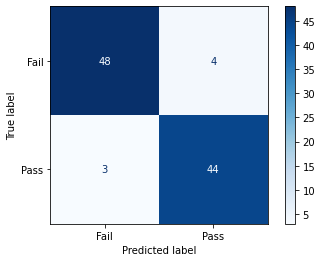

In [107]:
cm = confusion_matrix(y_test, estimator.predict(X_test))
cmd = ConfusionMatrixDisplay(cm, display_labels=['Fail','Pass'])
cmd.plot(cmap = "Blues")

From the above confusion matrix, we can see that our model’s mis-classifications are minimal.